In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 14.1 MB/s 
     |████████████████████████████████| 182 kB 87.0 MB/s 
     |████████████████████████████████| 7.6 MB 75.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 13.2 MB/s 
     |████████████████████████████████| 212 kB 90.5 MB/s 
     |████████████████████████████████| 115 kB 82.6 MB/s 
     |████████████████████████████████| 127 kB 68.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!pip install --upgrade --force-reinstall --no-deps transformers
!pip install --upgrade --force-reinstall --no-deps datasets
!pip install --upgrade --force-reinstall --no-deps huggingface_hub
!pip install --upgrade --force-reinstall --no-deps pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.24.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.24.0
    Uninstalling transformers-4.24.0:
      Successfully uninstalled transformers-4.24.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached datasets-2.7.1-py3-none-any.whl (451 kB)
  Attempting uninstall: datasets
    Found existing installation: datasets 2.7.1
    Uninstalling datasets-2.7.1:
      Successfully uninstalled datasets-2.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached huggingface_hub-0.11.1-py3-none-any.whl (182 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.11.1
    Uninstalling huggingface-hub-0.11.1:
      Successfully uninstalled huggingface-hub

In [ ]:
from transformers import RobertaConfig

In [ ]:
config = RobertaConfig()

In [ ]:
config

RobertaConfig {
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:
from datasets import load_dataset,DatasetDict
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
DATA_PATH = "/content/drive/MyDrive/MA/HateSpeechAdded.csv" # In Colab

In [ ]:
# pandas_df = pd.read_csv("labeled_data.csv")
pandas_df = pd.read_csv(DATA_PATH)
pandas_df.head()

,channel,username,message,isHateSpeech,Unnamed: 4
0,valorant,vkeckz,@1xshadowx69 bruh what,0,NaN
1,valorant,baaaaaaaaaaaaaaaaattttt,AYOOOOOOOOOOO,0,NaN
2,valorant,kaaamu,n1,0,NaN
3,valorant,junlee3167,?,0,NaN
4,valorant,indivix,PogChamp,0,NaN


In [ ]:
pandas_df['message'] = pandas_df['message'].str.replace('@[A-Za-z0-9]+\s?', '', regex=True) #cleaning the data
pandas_df.head()

,channel,username,message,isHateSpeech,Unnamed: 4
0,valorant,vkeckz,bruh what,0,NaN
1,valorant,baaaaaaaaaaaaaaaaattttt,AYOOOOOOOOOOO,0,NaN
2,valorant,kaaamu,n1,0,NaN
3,valorant,junlee3167,?,0,NaN
4,valorant,indivix,PogChamp,0,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


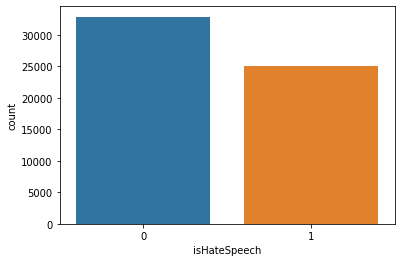

In [ ]:
import seaborn as sns
sns.countplot('isHateSpeech', data=pandas_df)

In [ ]:
pandas_df['isHateSpeech'].dtypes

dtype('int64')

In [ ]:
pandas_df = pandas_df.drop(['username', 'channel','Unnamed: 4'], axis=1)

In [ ]:
from datasets import Dataset

ds = Dataset.from_pandas(pandas_df)
ds

Dataset({
    features: ['message', 'isHateSpeech'],
    num_rows: 57903
})

In [ ]:
dataset = load_dataset('csv', data_files=DATA_PATH, split='train')
dataset = dataset.remove_columns(['channel', 'username', 'Unnamed: 4'])
dataset

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-02a1aae3be733712/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


Dataset({
    features: ['message', 'isHateSpeech'],
    num_rows: 57903
})

In [ ]:
train_test_valid = ds.train_test_split()

test_valid = train_test_valid['test'].train_test_split()

train_test_valid_dataset = DatasetDict({
    'train': train_test_valid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']
    })

dataset = train_test_valid_dataset


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['message', 'isHateSpeech'],
        num_rows: 43427
    })
    test: Dataset({
        features: ['message', 'isHateSpeech'],
        num_rows: 3619
    })
    valid: Dataset({
        features: ['message', 'isHateSpeech'],
        num_rows: 10857
    })
})

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = TFRobertaModel.from_pretrained('roberta-base')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
text = "I will be going home now, he said"

output = tokenizer(text)

output

{'input_ids': [0, 100, 40, 28, 164, 184, 122, 6, 37, 26, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(output['input_ids'])
tokens

['<s>',
 'I',
 'Ġwill',
 'Ġbe',
 'Ġgoing',
 'Ġhome',
 'Ġnow',
 ',',
 'Ġhe',
 'Ġsaid',
 '</s>']

In [ ]:
print(f"Tokenized text: {tokenizer.convert_tokens_to_string(tokens)}")

Tokenized text: <s>I will be going home now, he said</s>


In [ ]:
print(f"Vocab size is : {tokenizer.vocab_size}")

print(f"Model max length is : {tokenizer.model_max_length}")

print(f"Model input names are: {tokenizer.model_input_names}")

Vocab size is : 50265
Model max length is : 512
Model input names are: ['input_ids', 'attention_mask']


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['message', 'isHateSpeech'],
        num_rows: 43427
    })
    test: Dataset({
        features: ['message', 'isHateSpeech'],
        num_rows: 3619
    })
    valid: Dataset({
        features: ['message', 'isHateSpeech'],
        num_rows: 10857
    })
})

In [ ]:
def tokenize_function(train_dataset):
    return tokenizer(train_dataset['message'], padding='max_length', truncation=True)

tokenized_dataset = dataset.map(tokenize_function, batched=True)


  0%|          | 0/44 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/11 [00:00<?, ?ba/s]

In [ ]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['message', 'isHateSpeech', 'input_ids', 'attention_mask'],
        num_rows: 43427
    })
    test: Dataset({
        features: ['message', 'isHateSpeech', 'input_ids', 'attention_mask'],
        num_rows: 3619
    })
    valid: Dataset({
        features: ['message', 'isHateSpeech', 'input_ids', 'attention_mask'],
        num_rows: 10857
    })
})

In [ ]:
train_dataset = tokenized_dataset['train']
eval_dataset = tokenized_dataset['valid']
test_dataset = tokenized_dataset['test']

In [ ]:
train_dataset

Dataset({
    features: ['message', 'isHateSpeech', 'input_ids', 'attention_mask'],
    num_rows: 43427
})

In [ ]:
train_set = train_dataset.remove_columns(["message"]).with_format('tensorflow')

tf_eval_dataset = eval_dataset.remove_columns(["message"]).with_format('tensorflow')

tf_test_dataset = test_dataset.remove_columns(["message"]).with_format('tensorflow')

In [ ]:
train_features = { x: train_set[x] for x in tokenizer.model_input_names  }

train_set_for_final_model = tf.data.Dataset.from_tensor_slices((train_features, train_set['isHateSpeech'] ))
train_set_for_final_model = train_set_for_final_model.shuffle(len(train_set)).batch(32)

eval_features = {x: tf_eval_dataset[x] for x in tokenizer.model_input_names}
val_set_for_final_model = tf.data.Dataset.from_tensor_slices((eval_features, tf_eval_dataset['isHateSpeech']))
val_set_for_final_model = val_set_for_final_model.batch(32)

test_features = {x: tf_test_dataset[x] for x in tokenizer.model_input_names}
test_set_for_final_model = tf.data.Dataset.from_tensor_slices((test_features, tf_test_dataset['isHateSpeech']))
test_set_for_final_model =test_set_for_final_model.batch(32)

In [ ]:
train_set_for_final_model

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc',f1_m,precision_m, recall_m]
)


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
history = model.fit(train_set_for_final_model, validation_data=val_set_for_final_model, epochs=9)

Epoch 1/9
1358/1358 [==============================] - 684s 488ms/step - loss: 0.4049 - acc: 0.8012 - f1_m: 0.4301 - precision_m: 0.3647 - recall_m: 0.5565 - val_loss: 0.3293 - val_acc: 0.8518 - val_f1_m: 0.5350 - val_precision_m: 0.4113 - val_recall_m: 0.7900
Epoch 2/9
1358/1358 [==============================] - 659s 486ms/step - loss: 0.2919 - acc: 0.8678 - f1_m: 0.5315 - precision_m: 0.4156 - recall_m: 0.7633 - val_loss: 0.3556 - val_acc: 0.8617 - val_f1_m: 0.5536 - val_precision_m: 0.4122 - val_recall_m: 0.8699
Epoch 3/9
1358/1358 [==============================] - 659s 485ms/step - loss: 0.2316 - acc: 0.8991 - f1_m: 0.5492 - precision_m: 0.4207 - recall_m: 0.8181 - val_loss: 0.3501 - val_acc: 0.8613 - val_f1_m: 0.5433 - val_precision_m: 0.4068 - val_recall_m: 0.8437
Epoch 4/9
1358/1358 [==============================] - 659s 485ms/step - loss: 0.1831 - acc: 0.9242 - f1_m: 0.5639 - precision_m: 0.4254 - recall_m: 0.8633 - val_loss: 0.3899 - val_acc: 0.8555 - val_f1_m: 0.5608 - val

In [ ]:
#loss, accuracy, f1_score, precision, recall = model.evaluate(train_set_for_final_model, val_set_for_final_model, verbose=0)

In [ ]:
model.save('/content/drive/MyDrive/MA/RobBertaTryFinal')

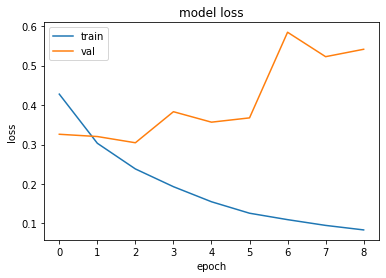

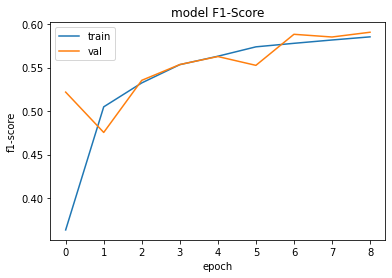

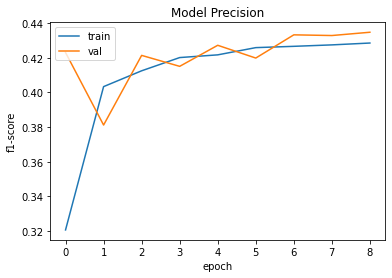

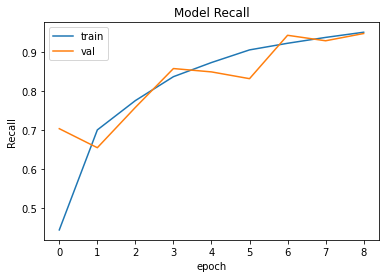

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model F1-Score')
plt.ylabel('f1-score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])
plt.title('Model Precision')
plt.ylabel('f1-score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc, bin_acc = model.evaluate(test_set_for_final_model,verbose=2)
print('\nTest accuracy:', test_acc)

114/114 - 17s - loss: 0.4559 - acc: 0.8524 - f1_m: 0.5678 - precision_m: 0.4184 - recall_m: 0.9096 - 17s/epoch - 148ms/step


ValueError: ignored

In [ ]:
ETHOS_Path = "/content/drive/MyDrive/MA/Ethos_Dataset_Binary.csv" # In Colab

In [117]:
csv = "/content/drive/MyDrive/MA/evaluationETHOS.csv"

In [118]:
Ethos = pd.read_csv(csv,sep=';')

In [115]:
Ethos
Ethos = Ethos.replace(['Hate Speech'], 1)



In [119]:
Ethos

,Label,Comment
0,1,You should know women's sports are a joke
1,0,You look like Sloth with deeper Down’s syndrome
2,1,You look like Russian and speak like Indian. ...
3,1,"Women deserve to be abused, I guess."
4,1,Women are made for making babies and cooking ...
...,...,...
993,0,From the midnight sun where the hot springs ...
994,0,Don't say I'm not your type
995,0,And therefore never send to know for whom th...
996,0,And I can't stand another day


In [ ]:
pandas_df_1 = pd.read_csv(ETHOS_Path,sep=';')
pandas_df_1.head()



,comment,isHate
0,You should know women's sports are a joke,1.0
1,You look like Sloth with deeper Down’s syndrome,1.0
2,You look like Russian and speak like Indian. B...,1.0
3,"Women deserve to be abused, I guess.",1.0
4,Women are made for making babies and cooking d...,1.0


In [ ]:
pandas_df_1

In [ ]:
predict_score_and_class_dict = {0: 'None',
 1: 'Hate Speech'}
preds = model(tokenizer(["You should know women's sports are a joke"],return_tensors="tf",padding=True,truncation=False))['logits']
print(preds)
class_preds = np.argmax(preds, axis=1)

for pred in class_preds:
  print(predict_score_and_class_dict[pred])

tf.Tensor([[-3.4300752  3.5867383]], shape=(1, 2), dtype=float32)
Hate Speech


In [ ]:
for column in pandas_df_1:
    print(pandas_df_1['message'])

0              You should know women's sports are a joke
1        You look like Sloth with deeper Down’s syndrome
2      You look like Russian and speak like Indian. B...
3                   Women deserve to be abused, I guess.
4      Women are made for making babies and cooking d...
                             ...                        
993     From the midnight sun where the hot springs blow
994                          Don't say I'm not your type
995     And therefore never send to know for whom the...
996                        And I can't stand another day
997     All values, unless otherwise stated, are in U...
Name: comment, Length: 998, dtype: object
0              You should know women's sports are a joke
1        You look like Sloth with deeper Down’s syndrome
2      You look like Russian and speak like Indian. B...
3                   Women deserve to be abused, I guess.
4      Women are made for making babies and cooking d...
                             ...              

In [ ]:
for column in pandas_df_1:
  string =pandas_df_1['comment'].values
  string = string.tolist()
  for item in string:
    predict_score_and_class_dict = {0: 'None', 1: 'Hate Speech'}
    preds = model(tokenizer([item],return_tensors="tf",padding=True,truncation=False))['logits']
    class_preds = np.argmax(preds, axis=1)
    for pred in class_preds:
      print(predict_score_and_class_dict[pred]+' '+';'+' '+item)

Hate Speech ; You should know women's sports are a joke
None ; You look like Sloth with deeper Down’s syndrome
Hate Speech ; You look like Russian and speak like Indian. Both are disgusting go kill yourself
Hate Speech ; Women deserve to be abused, I guess.
Hate Speech ; Women are made for making babies and cooking dinner and nothing else!!!
Hate Speech ; why haven't you faggots taken the bi-pill yet
Hate Speech ; Why don’t you go beck your god to murder you? Christianity is a joke
Hate Speech ; why does that african american monkey hold gun like that?
Hate Speech ; Why does Bulgaria exist as a country? It's one of those homosexual ones.
Hate Speech ; Why do negroes tear down their own neighborhoods when a black thug gets killed by law enforcement? Must be because of low IQ.
Hate Speech ; who gives aa fuck about shit diamonds from the jews fuck them both
Hate Speech ; Who do you think you are cunt? wtf! Stay steady to aim for head little christian rat
Hate Speech ; white people are shi

In [ ]:
for column in pandas_df_1:
  listofstrings = pandas_df_1['comment'].values


["You should know women's sports are a joke",
 'You look like Sloth with deeper Down’s syndrome',
 'You look like Russian and speak like Indian. Both are disgusting go kill yourself',
 'Women deserve to be abused, I guess.',
 'Women are made for making babies and cooking dinner and nothing else!!!',
 "why haven't you faggots taken the bi-pill yet",
 'Why don’t you go beck your god to murder you? Christianity is a joke',
 'why does that african american monkey hold gun like that?',
 "Why does Bulgaria exist as a country? It's one of those homosexual ones.",
 'Why do negroes tear down their own neighborhoods when a black thug gets killed by law enforcement? Must be because of low IQ.',
 'who gives aa fuck about shit diamonds from the jews fuck them both',
 'Who do you think you are cunt? wtf! Stay steady to aim for head little christian rat',
 'white people are shit human beings',
 'what happened in the good old days when these freaks did not exist ? which sewer have these freaks dragged

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/MA/RobBertaTryAdded_301122_try3', custom_objects= {'f1_m':f1_m}, compile=True)

NameError: ignored

In [ ]:
model.predict

TypeError: ignored

In [ ]:
 custom_objects={'acc'=acc,'f1_m'=f1_m, 'precision_m'=precision_m,'recall_m'=recall_m}

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = TFRobertaModel.from_pretrained('roberta-base')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


ValueError: ignored

In [ ]:
text = 'hello'

In [ ]:
output = tokenizer(text)